# EDA

Небольшой анализ данных. 

In [1]:
from load_data import *
import pandas as pd
import matplotlib.pyplot as plt

## Members

- **Количество пользователей:** 34403  
- **Столбцы с нулевым значением:** "gender"  
- **Количество городов:** 21  
- **Выбросы в возрасте**  

In [2]:
members_df = load_members("data/members.csv")

In [3]:
members_df.head()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,2011-08-20,2017-09-20
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,2015-06-28,2017-06-22
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,2016-04-11,2017-07-12
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,2015-09-06,2015-09-07
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,2017-01-26,2017-06-13


In [4]:
members_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34403 entries, 0 to 34402
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   msno                    34403 non-null  category      
 1   city                    34403 non-null  category      
 2   bd                      34403 non-null  uint8         
 3   gender                  14501 non-null  category      
 4   registered_via          34403 non-null  category      
 5   registration_init_time  34403 non-null  datetime64[ns]
 6   expiration_date         34403 non-null  datetime64[ns]
dtypes: category(4), datetime64[ns](2), uint8(1)
memory usage: 2.1 MB


In [5]:
members_df.city.unique()

['1', '13', '12', '15', '5', ..., '16', '9', '21', '7', '19']
Length: 21
Categories (21, object): ['1', '10', '11', '12', ..., '6', '7', '8', '9']

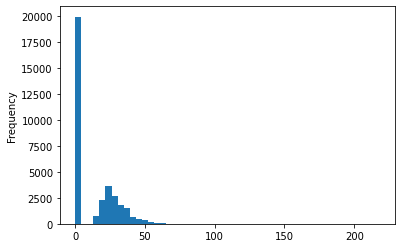

In [6]:
members_df.bd.plot.hist(bins=50);

In [7]:
members_df.gender.value_counts()

male      7405
female    7096
Name: gender, dtype: int64

In [8]:
members_df.registered_via.value_counts()

4     11392
7      9433
9      8628
3      4879
13       70
16        1
Name: registered_via, dtype: int64

## Song info

- **Количество песен:** 2_295_971  
- **Уникальных названий:** 1_168_979

In [9]:
song_info_df = load_song_info("data/song_extra_info.csv")

In [10]:
song_info_df.head()

,song_id,name,isrc
0,LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=,我們,TWUM71200043
1,ClazTFnk6r0Bnuie44bocdNMM3rdlrq0bCGAsGUWcHE=,Let Me Love You,QMZSY1600015
2,u2ja/bZE3zhCGxvbbOB3zOoUjx27u40cf5g09UXMoKQ=,原諒我,TWA530887303
3,92Fqsy0+p6+RHe2EoLKjHahORHR1Kq1TBJoClW9v+Ts=,Classic,USSM11301446
4,0QFmz/+rJy1Q56C1DuYqT9hKKqi5TUqx0sN0IwvoHrw=,愛投羅網,TWA471306001


In [11]:
song_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2295971 entries, 0 to 2295970
Data columns (total 3 columns):
 #   Column   Dtype   
---  ------   -----   
 0   song_id  category
 1   name     category
 2   isrc     category
dtypes: category(3)
memory usage: 227.7 MB


In [12]:
song_info_df.name.value_counts()

Intro                      1734
Silent Night               1088
White Christmas            1018
Jingle Bells                964
Ave Maria                   792
                           ... 
Brake                         1
Braken                        1
Bran Nu Sweat This Beat       1
Branco                        1
｢初恋｣                          1
Name: name, Length: 1168979, dtype: int64

## Songs

- **Количество песен:** 2_296_320
- **Количество жанров:** 1045 (в том числе совместные жанры)
- **Количество артистов:** 222_363 (в том числе совместные песни)
- **Количество композиторов:** 329_823 (в том числе совместные песни)
- **Количество лириков:** 110_925 (в том числе совместные песни)
- **Количество языков:** 10

In [13]:
song_df = load_songs("data/songs.csv")

In [14]:
song_df.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0


In [15]:
song_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2296320 entries, 0 to 2296319
Data columns (total 7 columns):
 #   Column       Dtype   
---  ------       -----   
 0   song_id      category
 1   song_length  int64   
 2   genre_ids    category
 3   artist_name  category
 4   composer     category
 5   lyricist     category
 6   language     category
dtypes: category(6), int64(1)
memory usage: 166.4 MB


In [16]:
song_df.song_length.describe()

count    2.296320e+06
mean     2.469935e+05
std      1.609200e+05
min      1.850000e+02
25%      1.836000e+05
50%      2.266270e+05
75%      2.772690e+05
max      1.217385e+07
Name: song_length, dtype: float64

In [17]:
song_df.genre_ids.value_counts()

465                567911
958                176349
2022               168870
1609               166457
2122               139938
                    ...  
139|125|109|958         1
275|1180|1572           1
1609|94                 1
1969|444|2100           1
873|1609                1
Name: genre_ids, Length: 1045, dtype: int64

In [18]:
song_df.artist_name.value_counts()

Various Artists              145916
証聲音樂圖書館 ECHO MUSIC            11276
Billy Vaughn                   4828
รวมศิลปิน                      4432
Richard Clayderman             4180
                              ...  
Juan Formell| Los Van Van         1
Juan Corazon                      1
Juan Carlos Garvayo               1
Juan Blanco                       1
플레이송스 (PLAYSONGS)                 1
Name: artist_name, Length: 222363, dtype: int64

In [19]:
song_df.composer.value_counts()

Neuromancer                                                          17888
Johann Sebastian Bach                                                12105
Wolfgang Amadeus Mozart                                              10839
Marco Rinaldo                                                        10803
Traditional                                                          10105
                                                                     ...  
Michael Stafford|Stephen McGregor|David Wolinski|Richard O'Connor        1
Michael Stipe| Peter Buck| Mike Mills| Berry                             1
Michael Stuart|Jorge Gonzalez|Alberto Gaitan|Ricardo Gaitan              1
Michael Sturminger                                                       1
ＹＡＮＡＧＩＭＡＮ                                                                1
Name: composer, Length: 329823, dtype: int64

In [20]:
song_df.lyricist.value_counts()

Traditional                          1751
―                                    1530
林夕                                   1015
Michael Ruland                        832
Lin Xi                                671
                                     ... 
ชำนาญ เขม่นจันทร์ & ณรงค์ สุขสมบท       1
ณัฐภพ พรหมสุนทรสกุล (กวาง )             1
André Isidro                            1
ดิลก ดิเรกฤทธ์                          1
ＺＯＰＰ                                    1
Name: lyricist, Length: 110925, dtype: int64

In [21]:
song_df.language.value_counts()

52.0    1336694
-1.0     639467
3.0      106295
17.0      92518
24.0      41744
31.0      39201
10.0      15482
45.0      14435
59.0       8098
38.0       2385
Name: language, dtype: int64

## Train

- **Количество записей:** 7_377_418
- **Количество source_system_tab:** 8 
- **Количество source_screen_name:** 20
- **Количество source_type:** 12
- **Распределение по классам почти равномерное**

In [22]:
train_df = load_train("data/train.csv")

In [23]:
train_df.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1


In [24]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7377418 entries, 0 to 7377417
Data columns (total 6 columns):
 #   Column              Dtype   
---  ------              -----   
 0   msno                category
 1   song_id             category
 2   source_system_tab   category
 3   source_screen_name  category
 4   source_type         category
 5   target              uint8   
dtypes: category(5), uint8(1)
memory usage: 82.4 MB


In [25]:
train_df.source_system_tab.value_counts()

my library      3684730
discover        2179252
search           623286
radio            476701
listen with      212266
explore          167949
notification       6185
settings           2200
Name: source_system_tab, dtype: int64

In [26]:
train_df.source_screen_name.value_counts()

Local playlist more     3228202
Online playlist more    1294689
Radio                    474467
Album more               420156
Search                   298487
Artist more              252429
Discover Feature         244246
Discover Chart           213658
Others profile more      201795
Discover Genre            82202
My library                75980
Explore                   72342
Unknown                   54170
Discover New              15955
Search Trends             13632
Search Home               13482
My library_Search          6451
Self profile more           212
Concert                      47
Payment                      12
Name: source_screen_name, dtype: int64

In [27]:
train_df.source_type.value_counts()

local-library             2261399
online-playlist           1967924
local-playlist            1079503
radio                      483109
album                      477344
top-hits-for-artist        423614
song                       244722
song-based-playlist        210527
listen-with                192842
topic-article-playlist      11194
artist                       3038
my-daily-playlist             663
Name: source_type, dtype: int64

In [28]:
train_df.target.value_counts()

1    3714656
0    3662762
Name: target, dtype: int64